# TRABAJO TEMA 2 Eines d’anàlisi i visualització de dades

## Problema 1

Aqui antes de empezar a trabajar con los datos, importo las librerias que necesitaré mas adelante.

In [1]:
library(dplyr) #para operaciones como mutate
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Leo los datos del fichero ‘HAVD_Exo02.csv’ y los guardo en la variable data, despues hago un
pequeño print para ver los primeras filas de estos datos y ver como estan organizados.

In [3]:
data <- read.csv(file='HAVD_Exo02.csv', header=TRUE, sep=',', dec='.')
head(data,4)

Dte.      Barris            TOTAL   X0    X1    X2    X3    X4    X5    X6   
1 BARCELONA                   1625137 13633 13918 13712 13533 14018 13968 13801
2 1         1. el Raval         47986   449   431   409   396   457   475   462
3 1         2. el Barri Gòtic   16240    99    97    93    88    99    97    89
4 1         3. la Barceloneta   15101    94   100    86   101    80    71    86
  ⋯ X91  X92  X93  X94  X95  X96  X97 X98 X99 X100
1 ⋯ 4528 3761 2923 2309 1658 1223 827 565 398 767 
2 ⋯   91   67   50   30   30   20  12   9   2  12 
3 ⋯   38   36   27   25   11    9  11   3   0  11 
4 ⋯   30   37   29   15   15   12   6   3   5   5

Como se puede apreciar, en este fichero hay 104 columnas en las que indican la cantidad de personas
que hay de una determinada edad viviendo en la ciudad de Barcelona, y en cada uno de sus barrios.

Tambien se puede ver que tipo de datos constituyen cada columna, los cuales se componen de datos
en su mayoria de tipo numerico.

Ahora, para poder trabajar con estos datos de la ciudad de Barcelona en general sin centrarme en
ningún barrio todavia, lo primero que tendré que hacer coger la primera fila de la varibale data,
y realizar una transposicion para obtener las edades en filas en lugar de columnas para facilitar el
tratamiento.

In [5]:
totalData <- data[1,-1:-3]
totalData <- as.data.frame(t(totalData))
colnames(totalData)[1] ="Values"
head(totalData,3)

Values
X0 13633 
X1 13918 
X2 13712

En esta última celda se pueden ver las primeras filas de los datos transpuestos

Ahora que tenemos los datos, haré un plot de un histograma para ver como estan distribuidos los
datos, sin embargo como podrá apreciarse a continuación, el hecho de que me de la frecuencia de
las edades, hace que el histograma me muestre cuantas veces una frecuencia se repite.

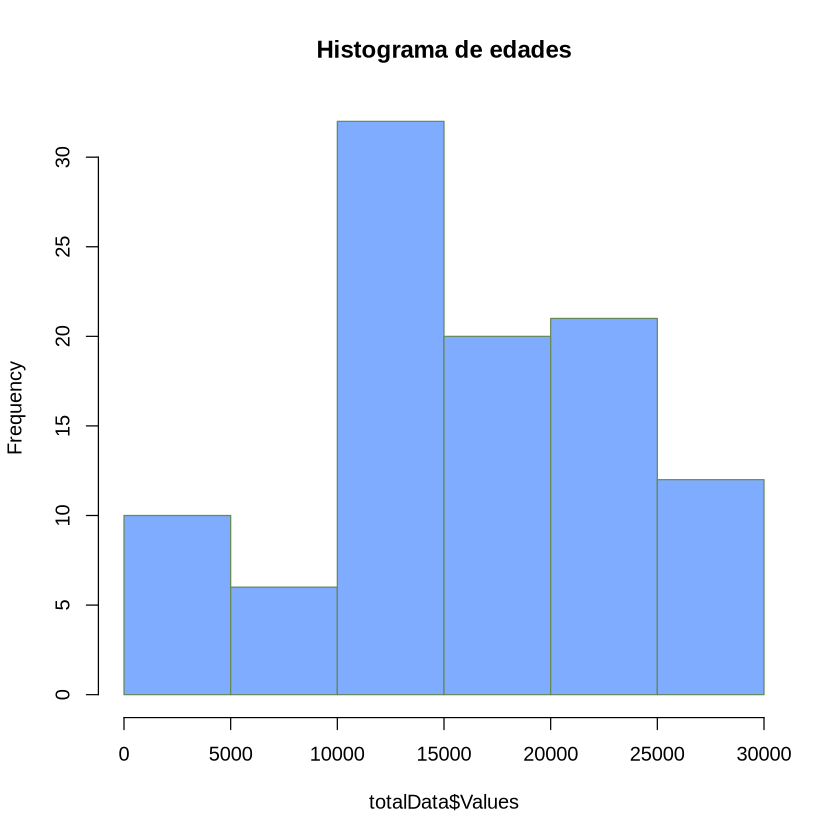

In [40]:
hist(totalData$Values,
    col=c("#7facff"),
    border="#668957",
    main= "Histograma de edades")

Tras el fracaso del histograma, haré un plot de un barchart para ver la distribución de los datos. Sin
emabrgo, esta no es la mejor manera de visualizar esta distribucion ya que mediante un histograma
se podria apreciar mucho mejor, pero de momento, como estoy teniendo problemas para tratar los
datos ya que se nos da la frecuencia de edades, usaré este gráfico para observar la distribución.

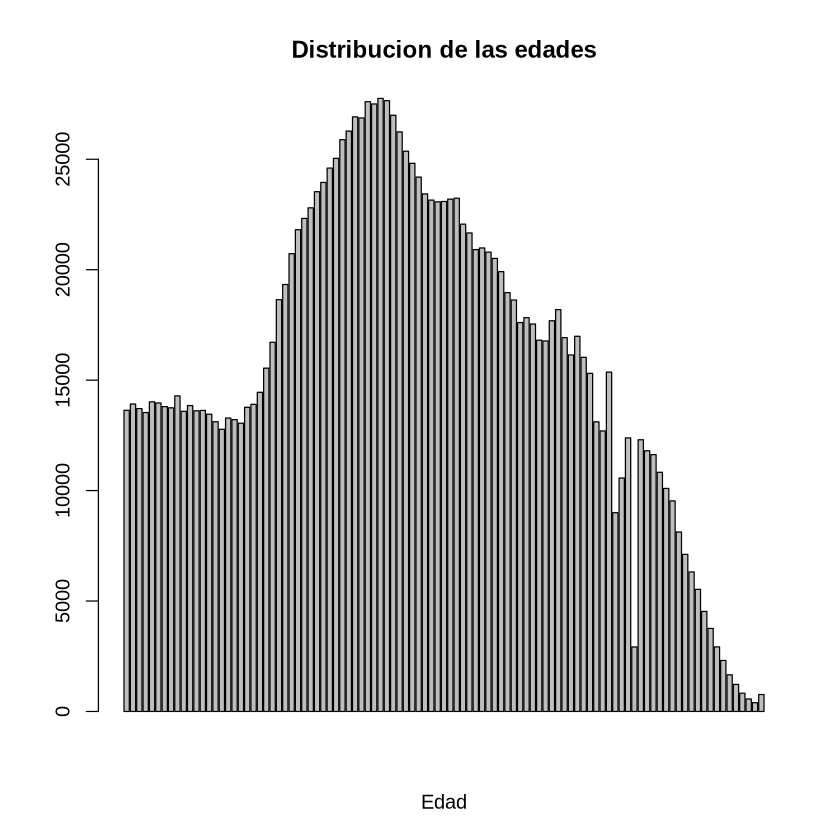

In [10]:
barplot(totalData$Values, main="Distribucion de las edades", xlab="Edad")

Como vemos, se pueden apreciar cuanto se repiten las edades, y la distribucion de estas. Sin
embargo no vemos los valores exactos de que franjas de edades estamos viendo. Aun asi, podemos
apreciar como hacia el centro del grafico podemos encontrar los valores mas altos y que estos van
descendiendo a medida que aumenta la edad.

Para intentar ser capaz de generar un histograma, en el siguiente código trato de crear un vector
con todas las edades repetidas las veces indicadas por su frecuencia dada en los datos.

In [9]:
counter <- 0
counter2 <- 0
vector <- c()
for (val in totalData$Values){
    counter <- 0
    while (counter < val) {
        vector <- append(vector,counter2)
        counter <- counter +1
    }
    counter2 <- counter2 +1
}

Por desgracia, el tiempo de compilacion de el codigo es mayor de 30 minutos y tuve que abortar la
operacion ya que no sabia cuándo terminaria de ejecutarse.

Sin embargo, tras investigar las funciones y algoritmos de este lenguaje, me encontré con la funcion
‘rep( )’, la cual permite crear un vector con los valores repetidos tantas veces como la frecuencia
indicada, y con un tiempo de compilación mínimo.

Pero antes de poder usar la función ‘rep( )’, he tenido que crear una segunda columna en este
dataframe en la cual basicamente se muestre la edad, esta columna tendrá siempre el mismo valor
que el indice, sin embargo su creación ha sido bastante importante para facilitar el uso de algunas
funciones como ‘rep( )’.

In [12]:
totalData <- mutate(totalData, Edad = seq(0, 100))
tail(totalData,4)

Values Edad
X97  827     97 
X98  565     98 
X99  398     99 
X100 767    100

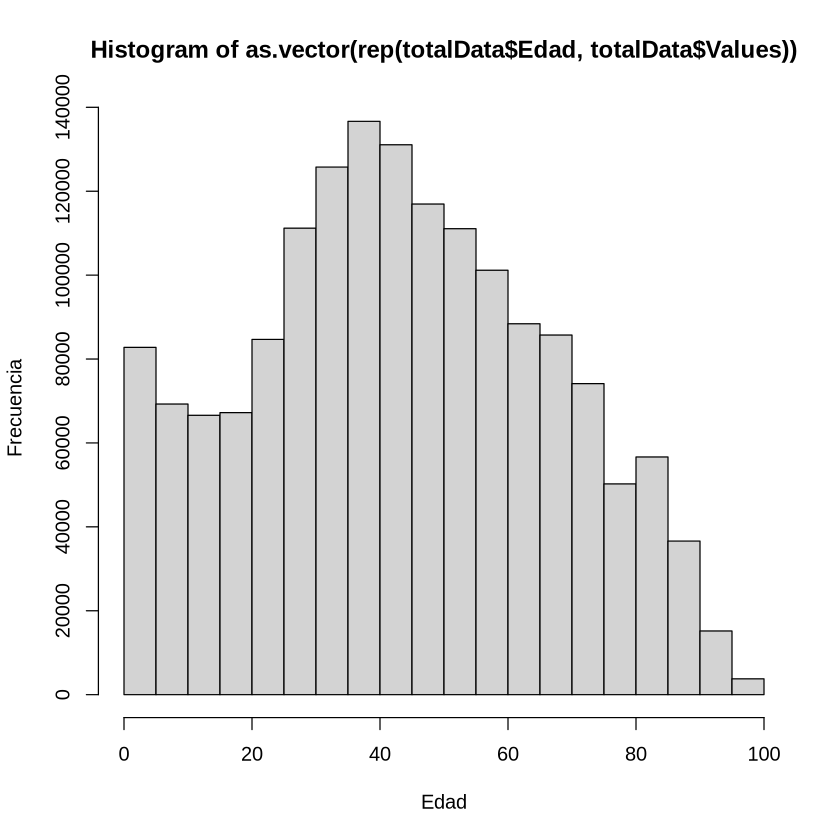

In [13]:
hist(as.vector(rep(totalData$Edad, totalData$Values)), xlab = "Edad", ylab ="Frecuencia")

Como se puede apreciar en el gráfico de arriba, ahora si que podemos observar bien como estan
distribuidos los datos.

En este grafico se confirma lo que se ha podido observar previamente en el grafico de barras donde
podia apreciarse que la moda de las edades se encuantra alrededor de los 40 años y que este valor
decrece hasta llegar al valor maximo que es aquellos con 100 años de edad o superior. Tambien
es interesante observar como decrece la cantidad de gente desde su nacimiento hasta cumplir los
25 años aproximadamente, en estos años podriamos hipotetizar que ya sea por comportamiento
temerario o otras razones, se podruce un incremento de la mortalidad. Esto tambien se puede
deber a otro factor no tan extremo, al tratarse de datos de una ciudad como Barcelona. Es muy
posible que veamos este incremento de gente de entre 25 y 65 años, debido a que se encuentran en
su edad de trabajar y es muy posible que se muevan hacia Barcelona en busca de trabajo.

Ahora, voy a generar un histograma para cada distrito para ver si se pueden observar tendencias dentro de alguno de ellos. Para ello, agrupare los datos en distritos y usare la libreria ggplot2 para
la generacion de los histogramas.

Histograma de edades del distrito:  1 


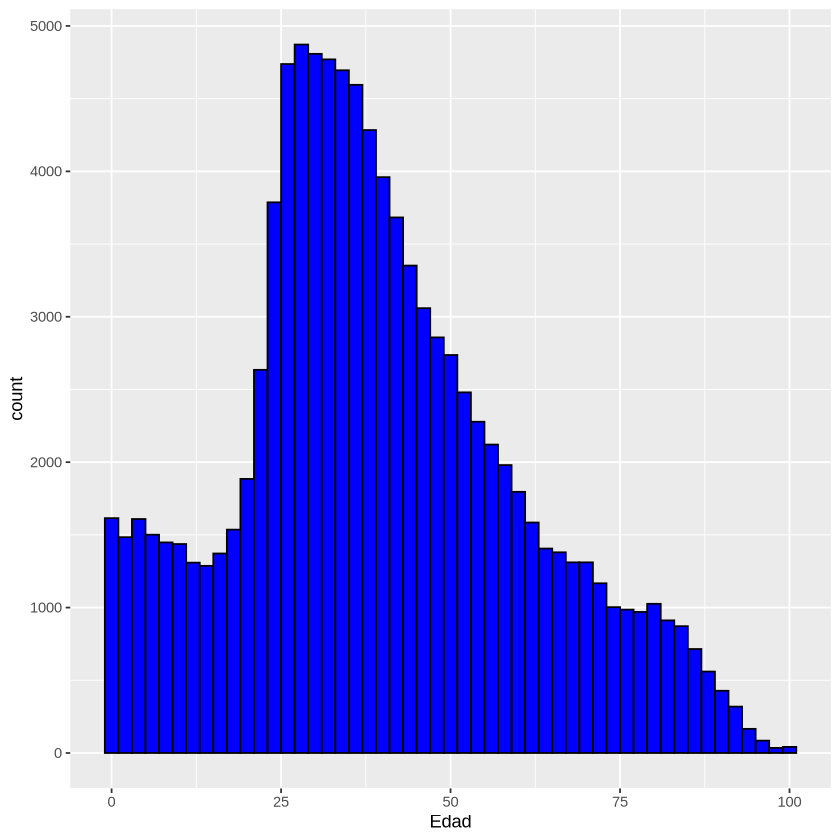

Histograma de edades del distrito:  2 


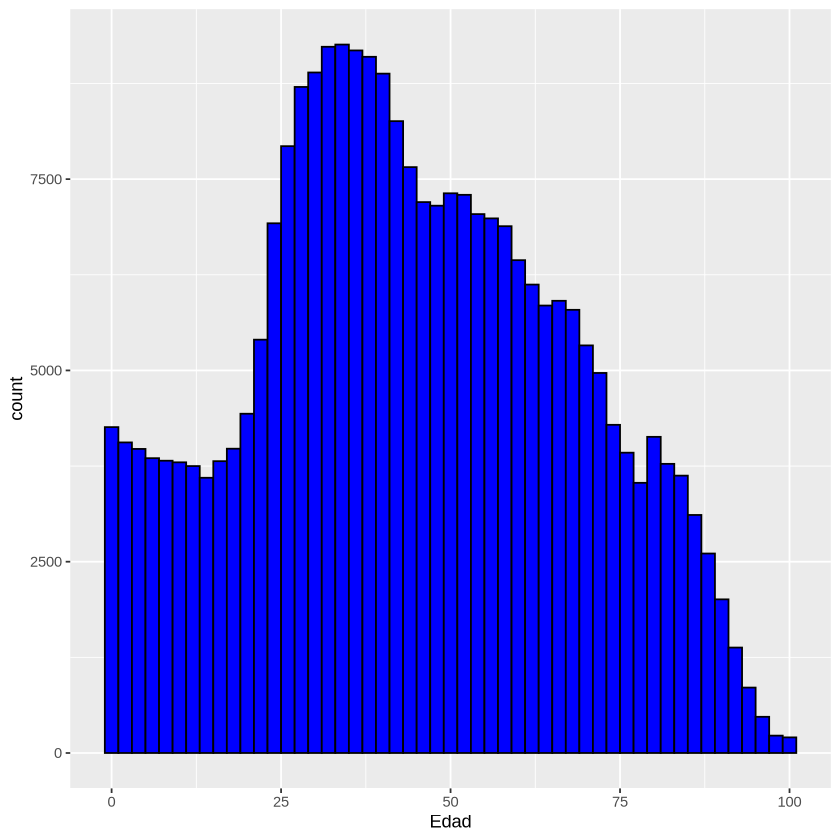

Histograma de edades del distrito:  3 


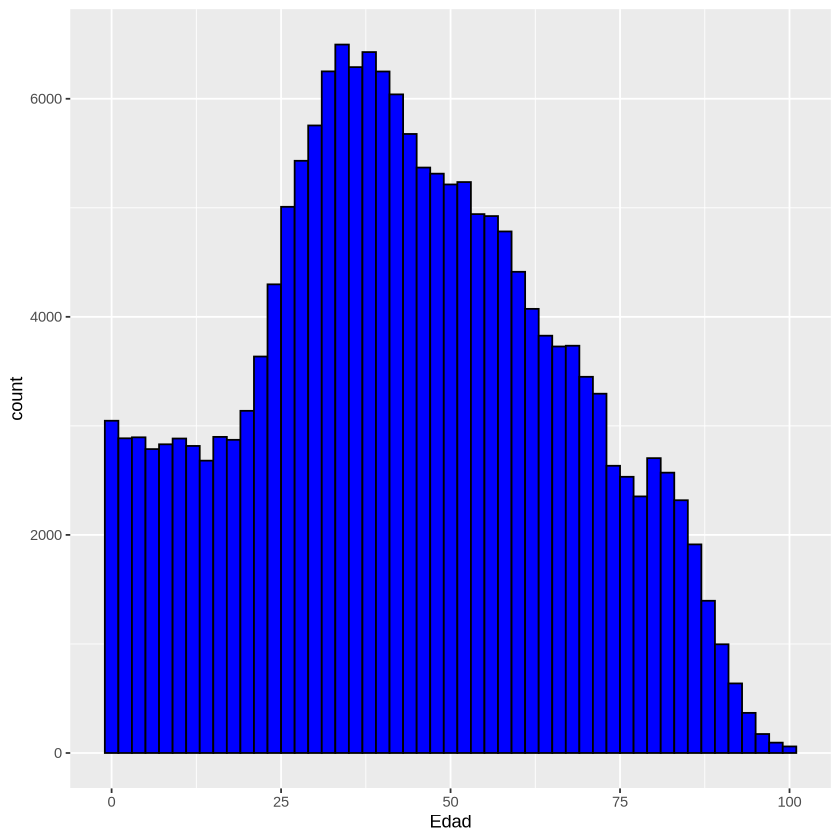

Histograma de edades del distrito:  4 


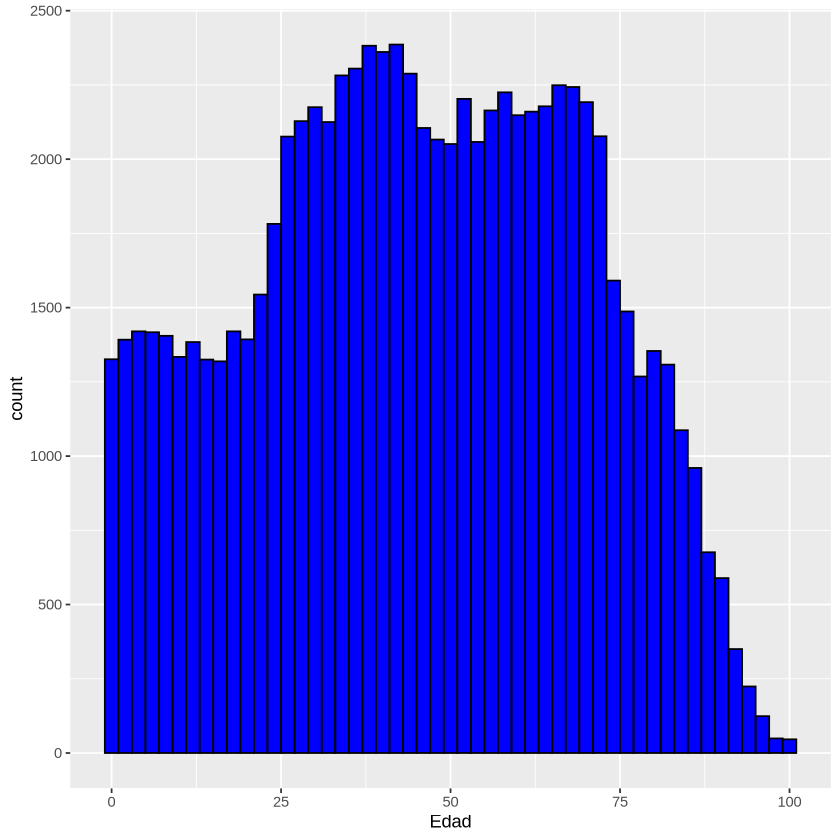

Histograma de edades del distrito:  5 


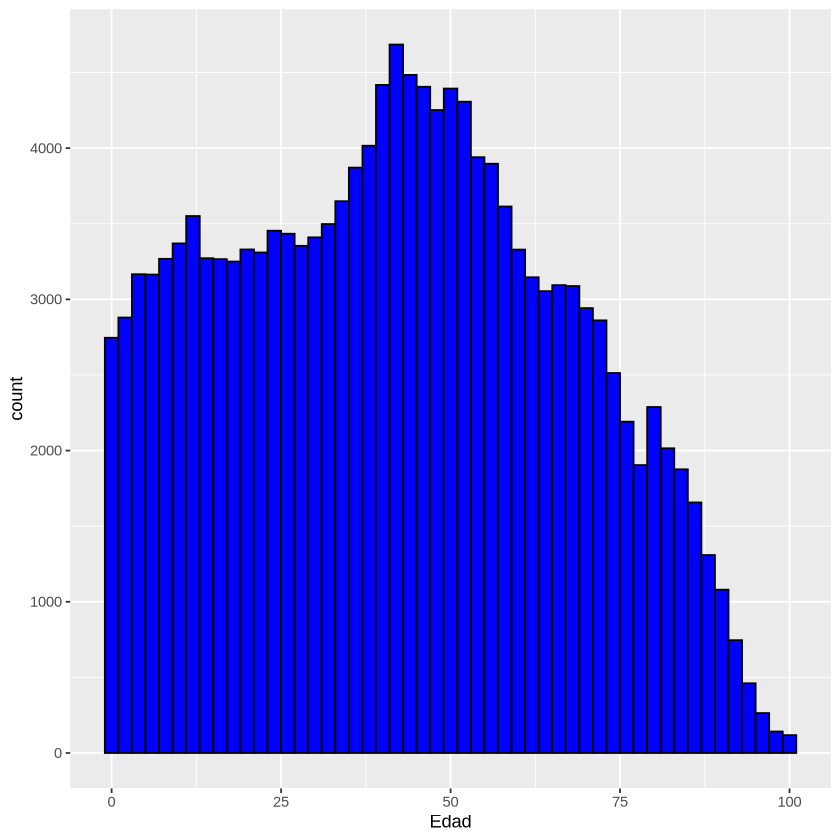

Histograma de edades del distrito:  6 


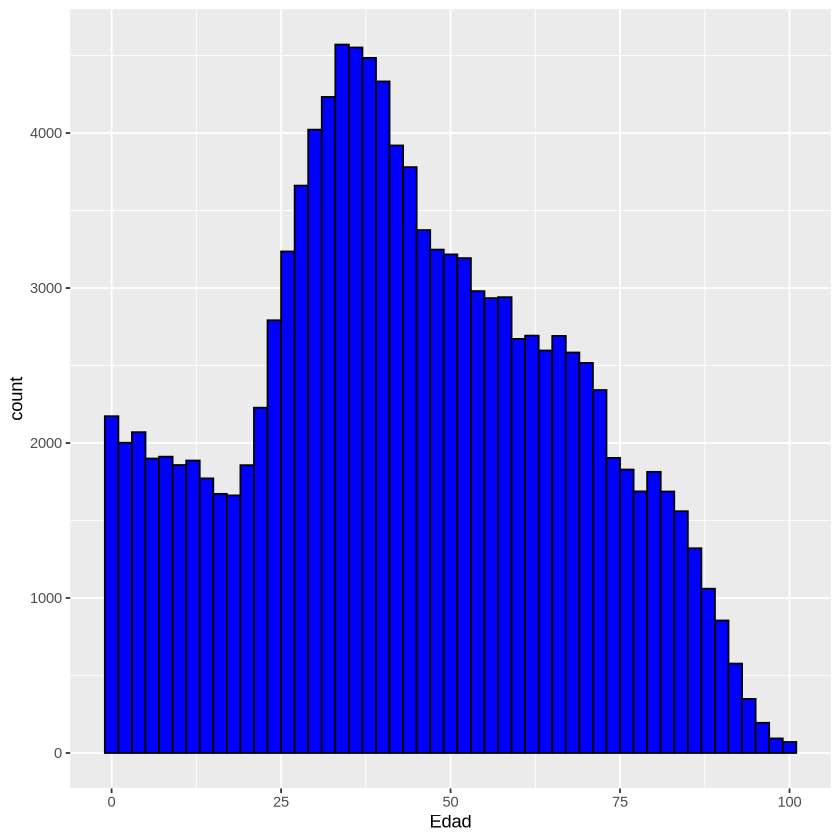

Histograma de edades del distrito:  7 


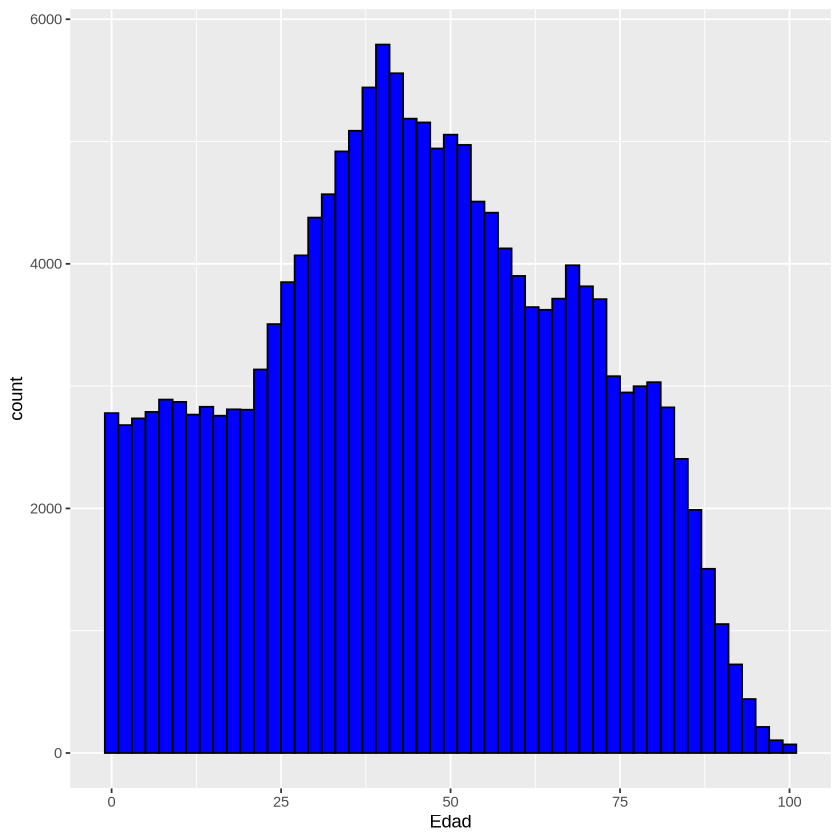

Histograma de edades del distrito:  8 


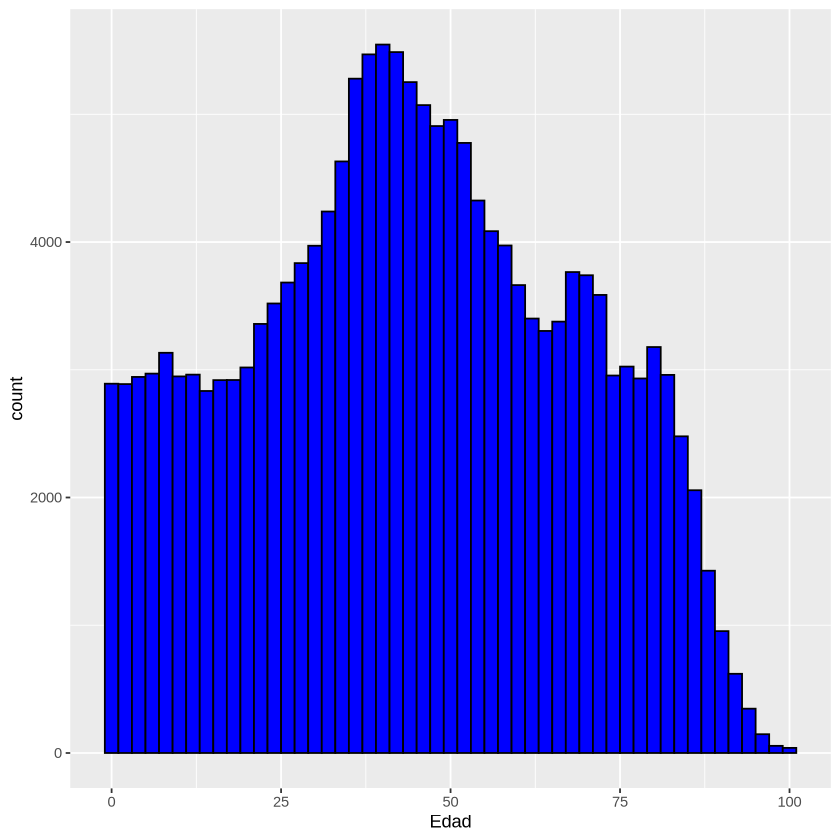

Histograma de edades del distrito:  9 


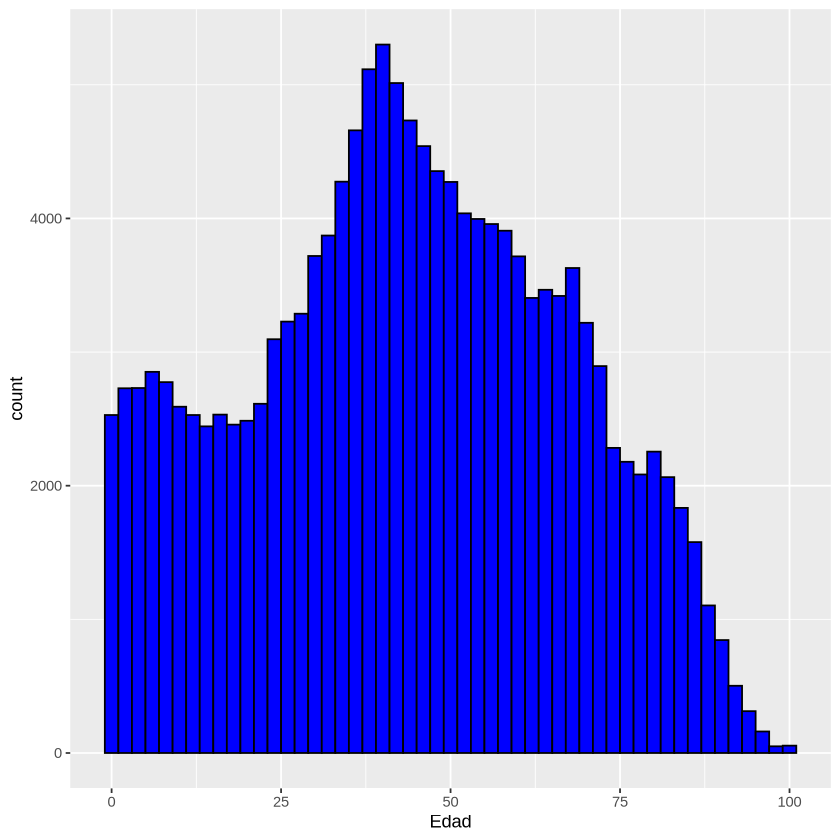

Histograma de edades del distrito:  10 


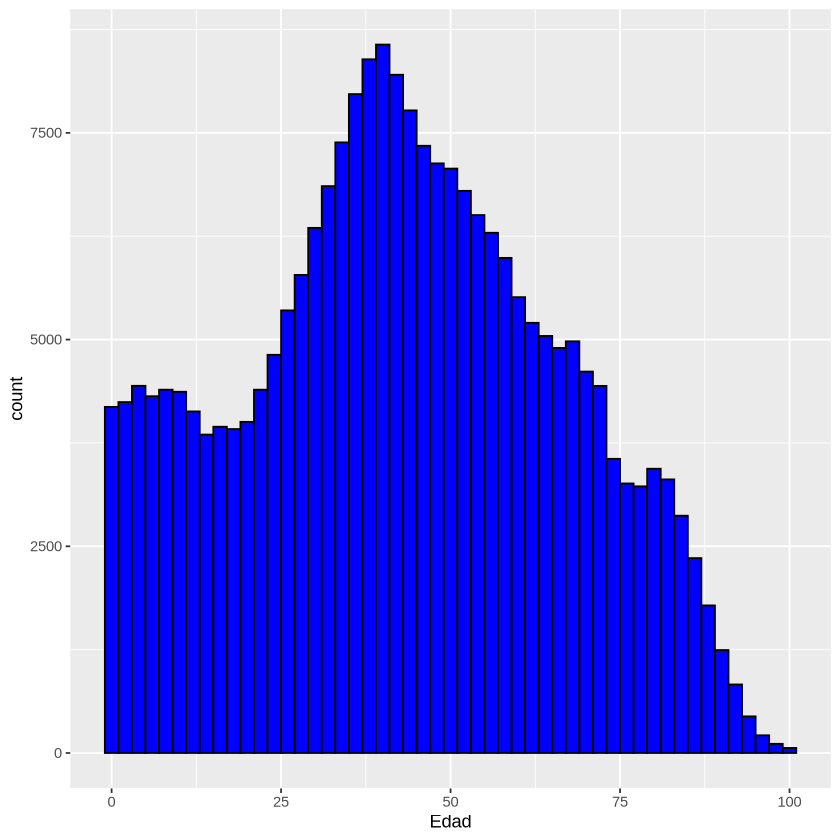

In [14]:
Distritos <- data[-1,1]
for (value in unique(Distritos)) {
    sub_data <- data[data$Dte. == value,]
    sub_data <- sub_data[-1:-3]
    sub_data[nrow(sub_data) + 1,] <- colSums(sub_data)
    sub_data <- sub_data[nrow(sub_data),]
    #sub_data[nrow(sub_data) + 1,] <- seq(0,100)
    sub_data <- as.data.frame(t(sub_data))
    colnames(sub_data)[1] ="Values"
    sub_data <- mutate(sub_data, Edad = seq(0, 100))
    #Edades <- rep(totalData$Edad, times = totalData$Values)
    print(ggplot(sub_data, aes(x=Edad)) + geom_histogram(aes(weight=Values),bins=51, color="black", fill="blue"))
    cat("Histograma de edades del distrito: ", value, "\n")
}


Tras observar todos los histogramas generados, podemos observar una tendencia general en todos
los distritos. Indicando esto que se trata de una distribucion de población muy homogénea entre los
distintos distritos de Barcelona. A excepción de la población joven, que dependiendo del distrito,
como por ejemplo el 5, 7 y 8, se puede observar que tenemos una distribución de población joven
mayor. De esto podriamos determinar aquellos distritos en los que hayan centros educativos, ya
que probablemente haya habido una migración por parte de la poblacion joven hacia estos lugares
para estar mas cerca del cntro.

En la siguiente celda generare un boxplot en el que mostrare la distribucion de las edades contra
su frecuencia, y mas tarde creare otro boxplot donde se podran apreciar los distintos quartiles y
será mas fácil de apreciar la distribución.

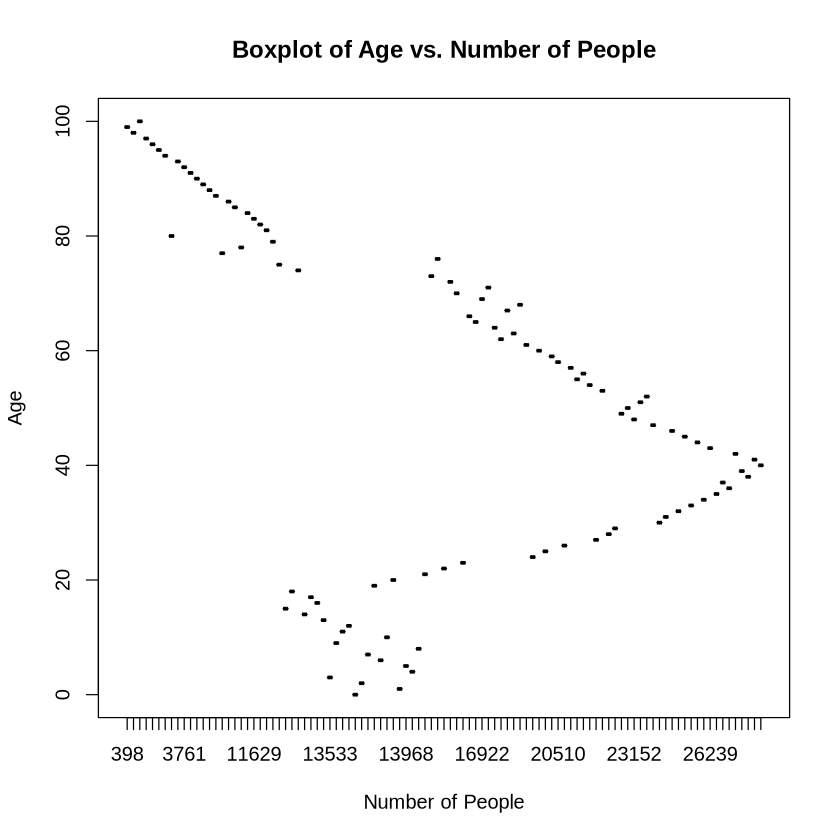

In [15]:
boxplot(totalData$Edad ~ totalData$Values,
    xlab = "Number of People",
    ylab = "Age",
    main = "Boxplot of Age vs. Number of People")

En este gráfico podemos apreciar algo parecido a lo visto en los histogramas, que las edades mas
repetidas se centran alrededor de los 40, y que hay muy poca gente mayor a 80 años.

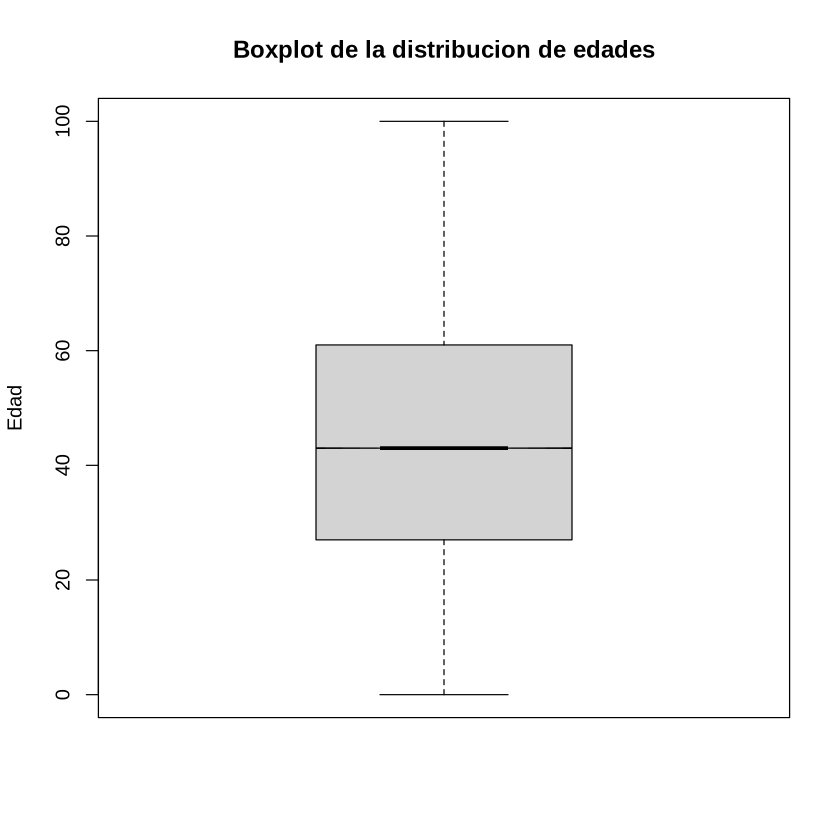

In [16]:
replicated_data <- rep(totalData$Edad, times = totalData$Values)
boxplot(replicated_data,
    main = "Boxplot de la distribucion de edades",
    ylab = "Edad",
    notch = TRUE)

En este boxplot podemos apreciar una serie de cosas, como por ejemplo que el 50% de los datos se
comprimen entre los 25 y los 60 años de edad. Tambien es interesante ver como no hay outliers,
aunque dada la naturaleza del dataset eso era algo esperado. Tambien podemos observar una mayor
dispersion de los datos en edades longevas que en los jovenes gracias a la separación de los quartiles.

Otra cosa a tener en cuenta es que la mediana se encuentra bastante cerca del medio de sus
dos quartiles adyacentes, y con este boxplot y los histogramas anteriores podriamos empezar a
considerar la posibilidad de que estos datos tiendan a seguir una distribución norma.

En la siguiente celda voy a recrear el codigo usado para generar histogramas para cada distrito,
pero esta vez generaré boxplots.

Boxplot de la distribucion de edades del distrito:  1 


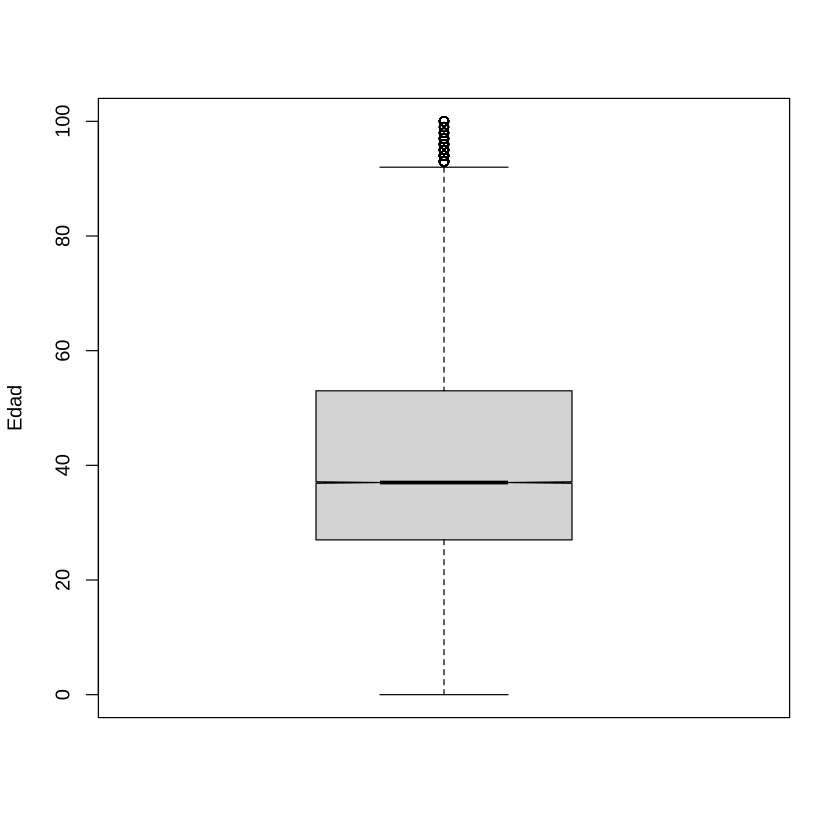

Boxplot de la distribucion de edades del distrito:  2 


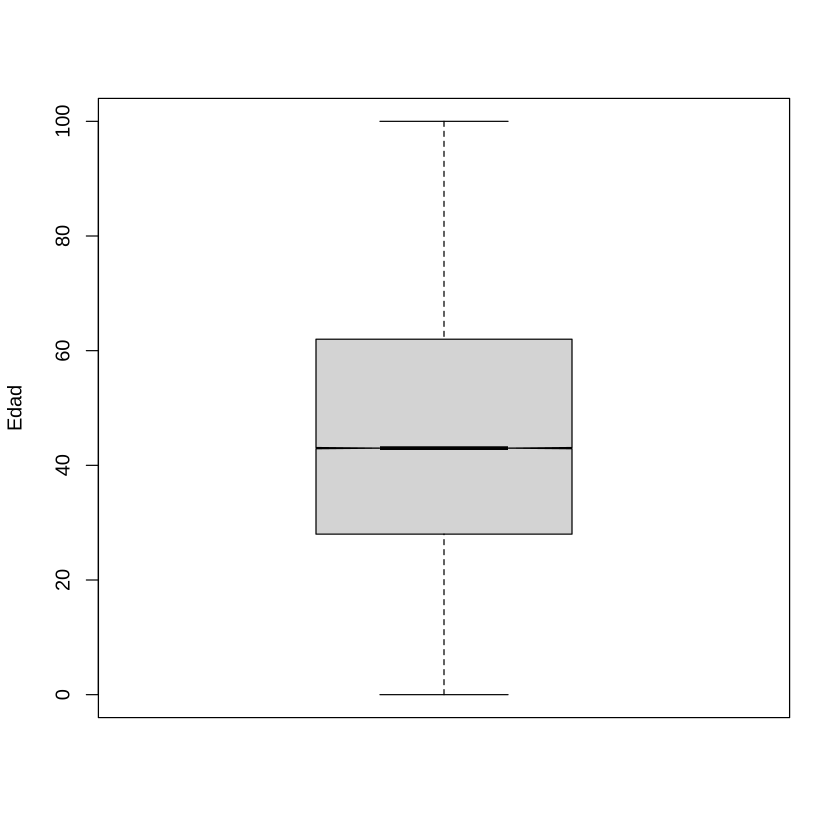

Boxplot de la distribucion de edades del distrito:  3 


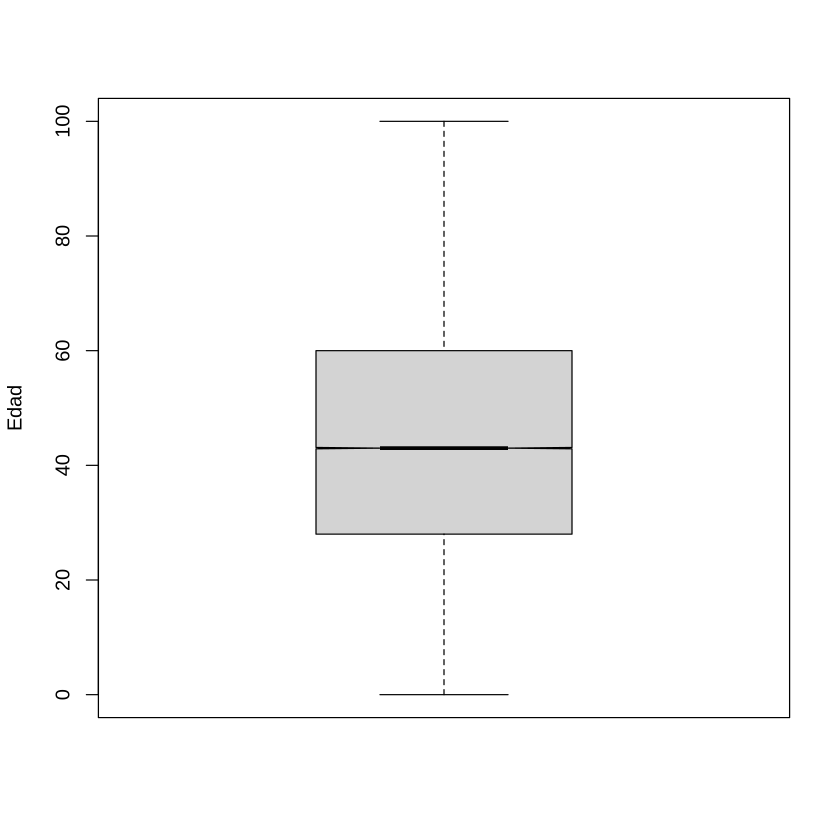

Boxplot de la distribucion de edades del distrito:  4 


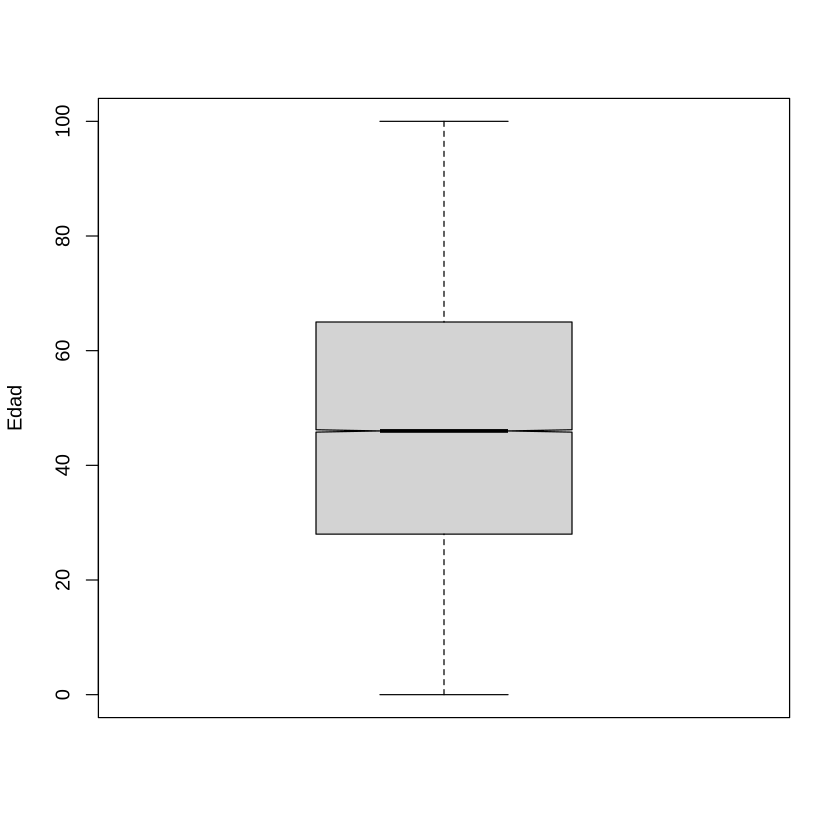

Boxplot de la distribucion de edades del distrito:  5 


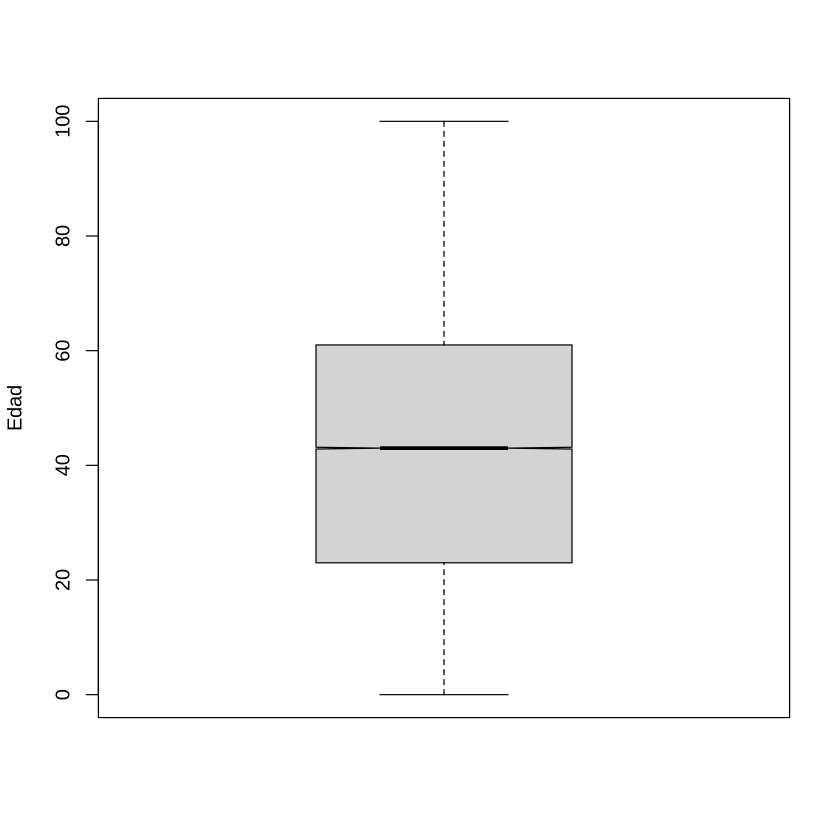

Boxplot de la distribucion de edades del distrito:  6 


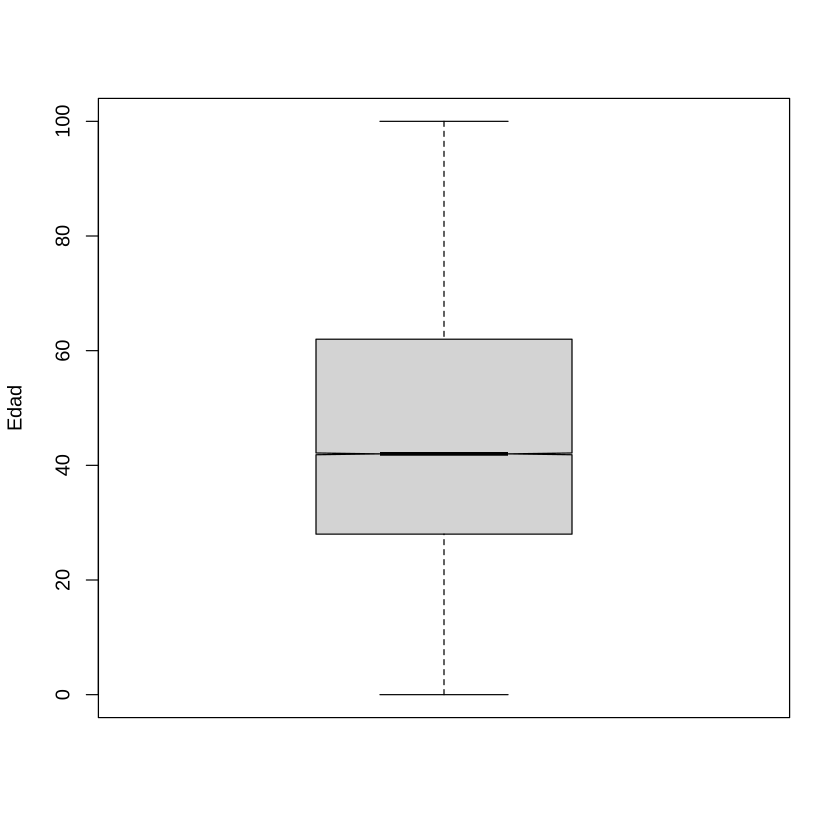

Boxplot de la distribucion de edades del distrito:  7 


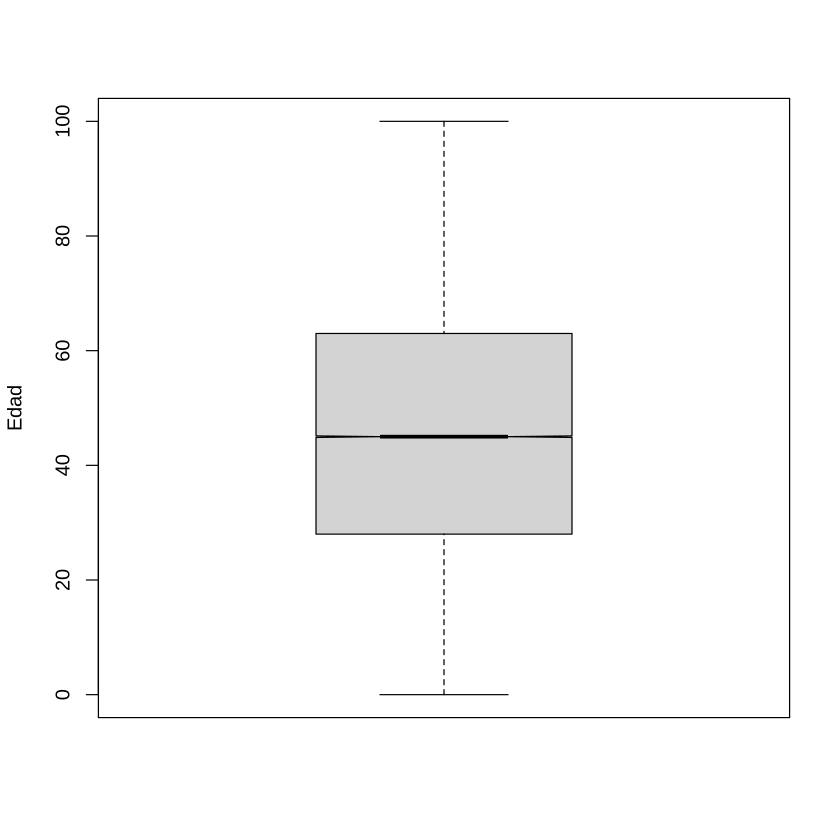

Boxplot de la distribucion de edades del distrito:  8 


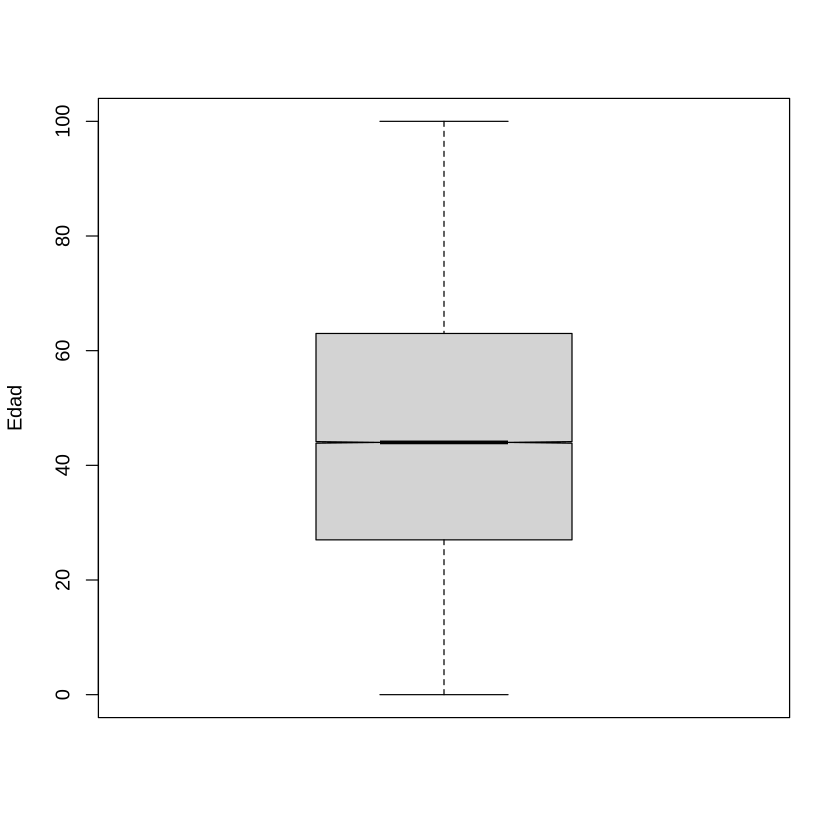

Boxplot de la distribucion de edades del distrito:  9 


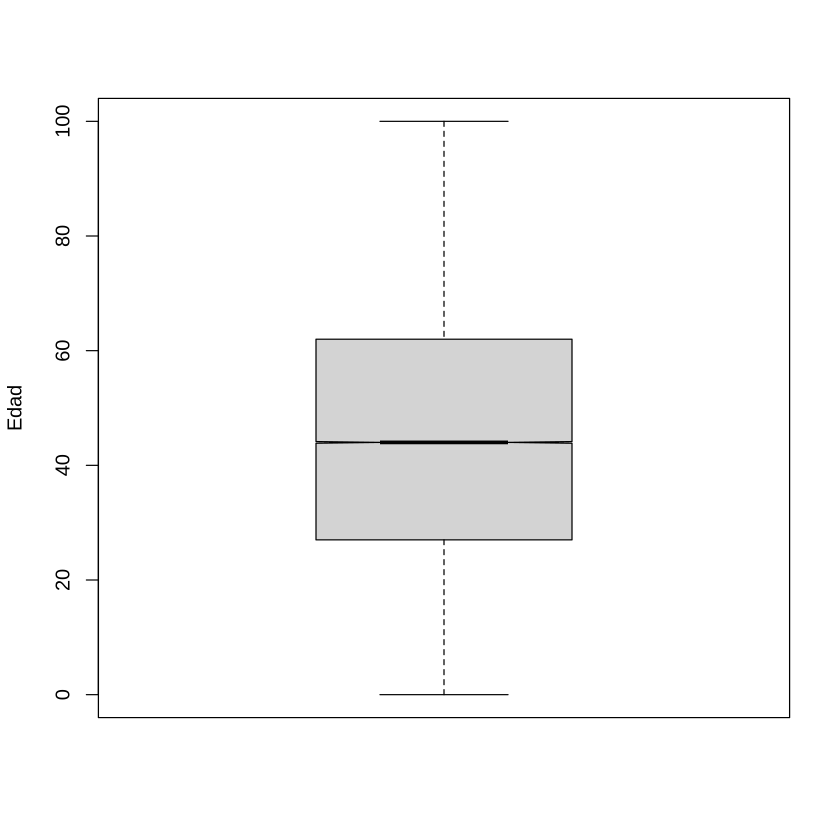

Boxplot de la distribucion de edades del distrito:  10 


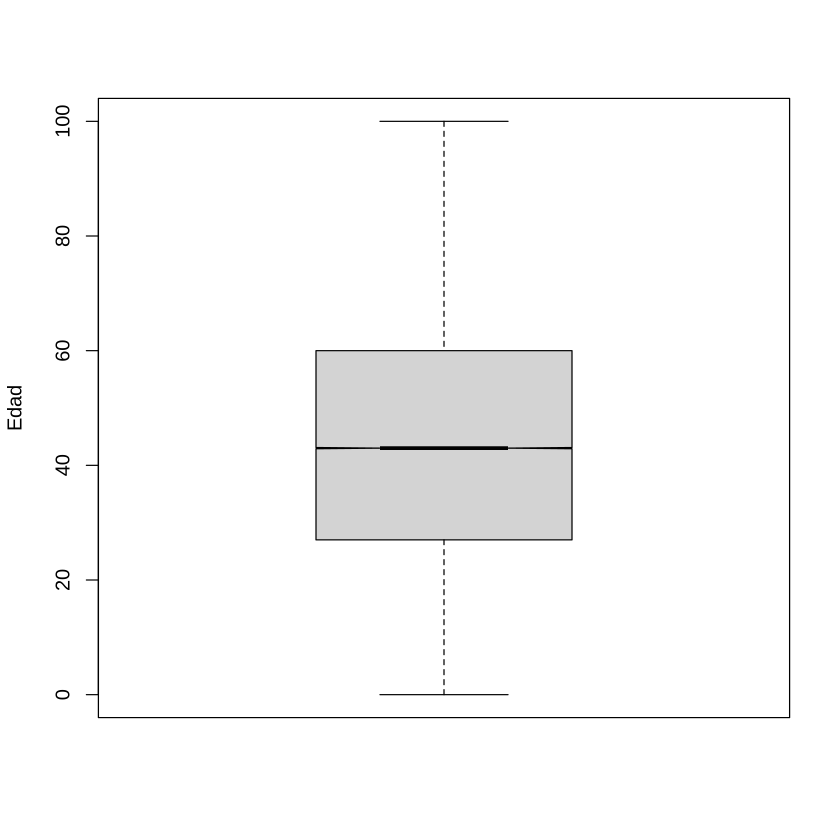

In [17]:
for (value in unique(Distritos)) {
    sub_data <- data[data$Dte. == value,]
    sub_data <- sub_data[-1:-3]
    sub_data[nrow(sub_data) + 1,] <- colSums(sub_data)
    sub_data <- sub_data[nrow(sub_data),]
    #sub_data[nrow(sub_data) + 1,] <- seq(0,100)
    sub_data <- as.data.frame(t(sub_data))
    colnames(sub_data)[1] ="Values"
    sub_data <- mutate(sub_data, Edad = seq(0, 100))
    Edades <- rep(sub_data$Edad, times = sub_data$Values)
    boxplot(Edades,
        ylab = "Edad",
        notch = TRUE)
    cat("Boxplot de la distribucion de edades del distrito: ", value, "\n")
}


El resultado de estos boxplots es bastante curioso, ya que todos parecen bastante similares, teniendo
todos la mediana alrededor de los 42 años de edad. Es curioso, porque tal y como se ha podido
observar en los histogramas anteriores, habian distritos con una mayor población joven que otros.
Sin embargo, la mediana permanece bastante estable incluso en esos distrits.

In [18]:
cat("La media de edades es:", mean(replicated_data), "\n")
cat("La desviación estándar de las edades es:", sd(replicated_data), "\n")
moda <- table(replicated_data)
moda <- as.numeric(names(moda[moda == max(moda)]))
cat("La moda de las edades es:", moda, "\n")
cat("La mediana de las edades es:", median(replicated_data), "\n")

La media de edades es: 43.72695 
La desviación estándar de las edades es: 23.10579 
La moda de las edades es: 40 
La mediana de las edades es: 43 


Esta última celda muestra distinta infromación sobre las edades que confirma lo dicho anteriormente, efectivamente la moda no solo esta alrededor de los 40 años de edad, sino que es exactamente
esa. Tal y como se puede apreciar tambien en el boxplot, la mediana se encuentra en los 43 años
de edad, con una media muy cercana a la mediana con un valor de 43.7 años, y una desviacion que
podriamos considerar considerablemente grande de 23.1 años.

Con esto ya daría por finalizado el analisis del problema 1, sin embargo hay algo que desde el
primer barplot ha estado en mi mente, y es que hay un valor en ese barplot en la edad de 80 años
que destaca enormemente entre los adyacentes, así que he decidido comprobar si la suma de los
habitantes de los distritos es igual a aquella proporcionada de la ciudad.

In [21]:
sum(data[-1, 'X80'])
data[1, 'X80']

[1] 12920

[1] 2920

En efecto, el valor es erroneo, la suma de los habitantes de los barrios es muy superior al número
de habitantes provisto en esa celda. En la siguiente celda procedire a corregir ese valor y generar
de nuevo el barplot de las edades.

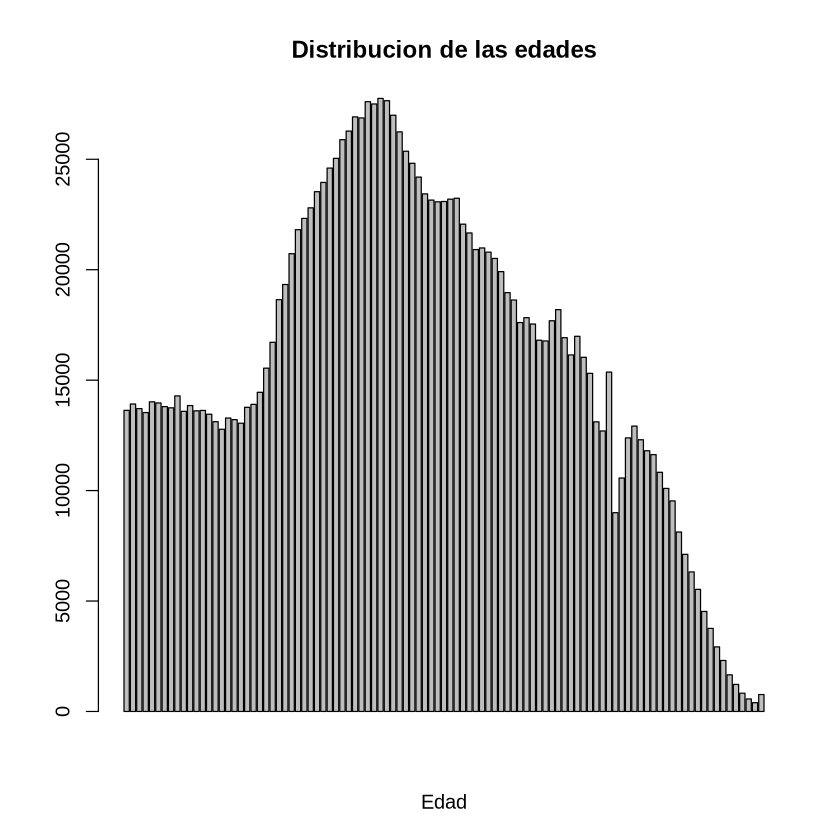

In [22]:
totalData[81,]$Values = sum(data[-1, 'X80'])

barplot(totalData$Values, main="Distribucion de las edades", xlab="Edad")

## Problema 2

In [31]:
halcon <- read.csv(file='Halcon.csv', header=TRUE, sep=',', dec='.')
head(halcon,4)

X Month Day Year CaptureTime ReleaseTime BandNumber Species Age Sex Wing
1 1 9     19  1992 13:30                   877-76317  RT      I       385 
2 3 9     23  1992 12:45                   877-76319  RT      I       381 
3 4 9     23  1992 10:50                   745-49508  CH      I   F   265 
4 5 9     27  1992 11:15                   1253-98801 SS      I   F   205 
  Weight Culmen Hallux Tail
1 920    25.7   30.1   219 
2 990    26.7   31.3   235 
3 470    18.7   23.5   220 
4 170    12.5   14.3   157

En este problema lo primer que se pide es obtener una visión global de los datos, para ello tras leer el fichero de datos, usare las funciones str y summary para observar algunas caracteríticas de estos datos.

In [25]:
str(halcon)

'data.frame':	891 obs. of  15 variables:
 $ X          : int  1 3 4 5 6 7 8 9 10 11 ...
 $ Month      : int  9 9 9 9 9 9 9 9 9 10 ...
 $ Day        : int  19 23 23 27 28 28 29 29 30 5 ...
 $ Year       : int  1992 1992 1992 1992 1992 1992 1992 1992 1992 1992 ...
 $ CaptureTime: chr  "13:30" "12:45" "10:50" "11:15" ...
 $ ReleaseTime: chr  "" " " " " " " ...
 $ BandNumber : chr  "877-76317" "877-76319" "745-49508" "1253-98801" ...
 $ Species    : chr  "RT" "RT" "CH" "SS" ...
 $ Age        : chr  "I" "I" "I" "I" ...
 $ Sex        : chr  "" "" "F" "F" ...
 $ Wing       : num  385 381 265 205 412 370 375 412 405 393 ...
 $ Weight     : int  920 990 470 170 1090 960 855 1210 1120 1010 ...
 $ Culmen     : num  25.7 26.7 18.7 12.5 28.5 25.3 27.2 29.3 26 26.3 ...
 $ Hallux     : num  30.1 31.3 23.5 14.3 32.2 30.1 30 31.3 30.2 30.8 ...
 $ Tail       : int  219 235 220 157 230 212 243 210 238 222 ...


In [26]:
summary(halcon)

       X             Month             Day             Year     
 Min.   :  1.0   Min.   : 8.000   Min.   : 1.00   Min.   :1992  
 1st Qu.:230.5   1st Qu.: 9.000   1st Qu.: 9.00   1st Qu.:1995  
 Median :460.0   Median :10.000   Median :16.00   Median :1999  
 Mean   :457.4   Mean   : 9.847   Mean   :15.69   Mean   :1998  
 3rd Qu.:684.5   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:2001  
 Max.   :908.0   Max.   :11.000   Max.   :31.00   Max.   :2003  
 CaptureTime        ReleaseTime         BandNumber          Species         
 Length:891         Length:891         Length:891         Length:891        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
     A

Lo primero que podemos osbervar de estas celdas, es que tenemos los datos de 891 halcones distintos los cuales en la primera columna de datos disponen de un identificador único para cada uno de ellos, la columna 'X'. Otra cosa interesante a observar es el hecho de que estas muestras solo son recogidas de los meses de Agosto a Noviembre, pero en distintos años, puesto que hay más de una decada de datos. Esto se puede deber a que es muy probable que en el periodo de migración de estas aves, su paso por el lugar donde se recogen estos datos ocurra entre los meses de Agosto a Noviembre de cada año.

Otra cosa que llama bastante la atención son la cantidad de valores nulos en las categorias de sexo y sobretodo hora de liberación, y no parece tener una explicación sencilla ya que desde un punto de vista lógico todas las aves capturadas deberían ser identificadas por sexo, y una vez analizadas deberian ser puestas en libertad para observar su proceso migratorio.

Tambien podemos observar como hay 3 categorias de especimenes distintos a nivel de especie, 2 a nivel de sexo y 2 más a nivel de edad. Además tambien podemos observar algo que será muy útil a la hora de crear las tablas de contingencia, y esto es los valores mínimos y máximos de las variables Wing y Tail.

Una vez entendidos los datos con los que estoy tratando me dispongo a crear las tablas de contingencia, para estas, creo 5 cubos distintos tanto para las alas como para las colas, para de este modo, agrupar los datos ya que de otra forma seria muy difícil entender las tablas. Los valores de las colas tienen un rango de 119 a 288 cm, con lo cual creo 5 cubos con saltos de 34 cm para obtener una respresentación por rangos. Despues creo un nuevo dataframe con estos nuevos rangos y me dispongo a crear tablas de contingencia para edad, espécie y sexo.

In [41]:
aux1 <- halcon[halcon$Tail >= 118 & halcon$Tail < 152,]
aux2 <- halcon[halcon$Tail >= 152 & halcon$Tail < 186,]
aux3 <- halcon[halcon$Tail >= 186 & halcon$Tail < 220,]
aux4 <- halcon[halcon$Tail >= 220 & halcon$Tail < 254,]
aux5 <- halcon[halcon$Tail >= 254 & halcon$Tail < 289,]

aux1$Tail <- 1
aux2$Tail <- 2
aux3$Tail <- 3
aux4$Tail <- 4
aux5$Tail <- 5

new_halcon <- rbind(aux1, aux2, aux3, aux4, aux5)

con1 <- table(new_halcon$Tail,new_halcon$Age)
con2 <- table(new_halcon$Tail,new_halcon$Species)
con3 <- table(new_halcon$Tail,new_halcon$Sex)

con1 
con2 
con3

   
      A   I
  1  40 103
  2  36  90
  3 106 174
  4  35 299
  5   2   6

   
     CH  RT  SS
  1   0   3 140
  2  16   0 110
  3  40 236   4
  4  13 320   1
  5   0   8   0

   
          F   M
  1   4  24 115
  2   0 109  17
  3 237  22  21
  4 317  15   2
  5   8   0   0

En estas tablas de contingencia se puede observar como la mayoria de valores nulos en la categoria del sexo de los halcones pertenece a aquellos con la cola grande, por lo tanto es muy posible que se trate de los halcones adultos, sin embargo, podemos ver como el hecho de que sean adultos o inmaduros, no marca una gran diferencia en cuanto al tamaño de la cola, pero esos datos podrian no ser muy fiables puesto que hay mucha más poblacion inmadura (I) que adulta (A). 
Tambien podemos observar como la especie (SS) tiene las alas mucho mas pequelas que las otras dos (RT) y (CH), aunque de esta última, tenemos muy pocas muestras.

In [44]:
con1 <- table(new_halcon$Sex,new_halcon$Species)
con2 <- table(new_halcon$Sex,new_halcon$Age)

con1
con2

   
     CH  RT  SS
      1 564   1
  F  35   3 132
  M  33   0 122

   
      A   I
    119 447
  F  58 112
  M  42 113

Me picaba la curiosidad la posible razón de la falta de idenificación en la categoria de sexo de los halcones, asi que he hecho dos tablas de contingencia con esa variable, una contra la edad y otra contra la especie. Al prinicpio pensaba que la falta de identificación, como tenía relacion con el tamaño de las alas, se deberia a la edad. Sin embargo tras observar estas tablas puedo concluir que esta falta de identificación se debe a la especie, ya que como podemos ver en la priemra tabla, la especie (RT) apenas tiene halcones con el sexo identificado.

A continuación me dispongo a crear las tablas de contingencia para la variable Wing, siguiendo el mismo procedimiento que con la variable tail, pero esta vez con un valor mínimo de 35 y máximo de 480 cm, con saltos de 89 cm entre los grupos.

In [39]:
aux1 <- halcon[halcon$Wing >= 35 & halcon$Wing < 124,]
aux2 <- halcon[halcon$Wing >= 124 & halcon$Wing < 213,]
aux3 <- halcon[halcon$Wing >= 213 & halcon$Wing < 302,]
aux4 <- halcon[halcon$Wing >= 302 & halcon$Wing < 391,]
aux5 <- halcon[halcon$Wing >= 391 & halcon$Wing < 481,]

aux1$Wing <- 1
aux2$Wing <- 2
aux3$Wing <- 3
aux4$Wing <- 4
aux5$Wing <- 5

new_halcon <- rbind(aux1, aux2, aux3, aux4, aux5)

con1 <- table(new_halcon$Wing,new_halcon$Age)
con2 <- table(new_halcon$Wing,new_halcon$Species)
con3 <- table(new_halcon$Wing,new_halcon$Sex)

con1 
con2 
con3

   
      A   I
  1   0   2
  2  70 181
  3  31  45
  4  67 277
  5  51 167

   
     CH  RT  SS
  1   0   2   0
  2   4   1 246
  3  62   6   8
  4   3 340   1
  5   0 218   0

   
          F   M
  1   2   0   0
  2   2 130 119
  3   7  35  34
  4 340   2   2
  5 215   3   0

En estas tablas, una vez más podemos observar como aquellos halcones con las alas grandes, en su mayoria no tienen el sexo identificado y a sabiendas de que esto se debe a la especie, mirando la segunda tabla podemos ver como la especie RT tambien tiene las alas grandes, lo cual se complementa correctamente con lo averiguado anteriormente.

A continuación me dispongo a generar un scatterplot de la variable Wing contra la variable Tail para ver como estan relacionadas, aunque a raiz de las tablas de contingencia se puede observar como es muy posible que tengan una correlación positiva bastante fuerte. Además, generare 3 scatterplots, en los que también podran identificarse el sexo, la edad y la especie de los halcones.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


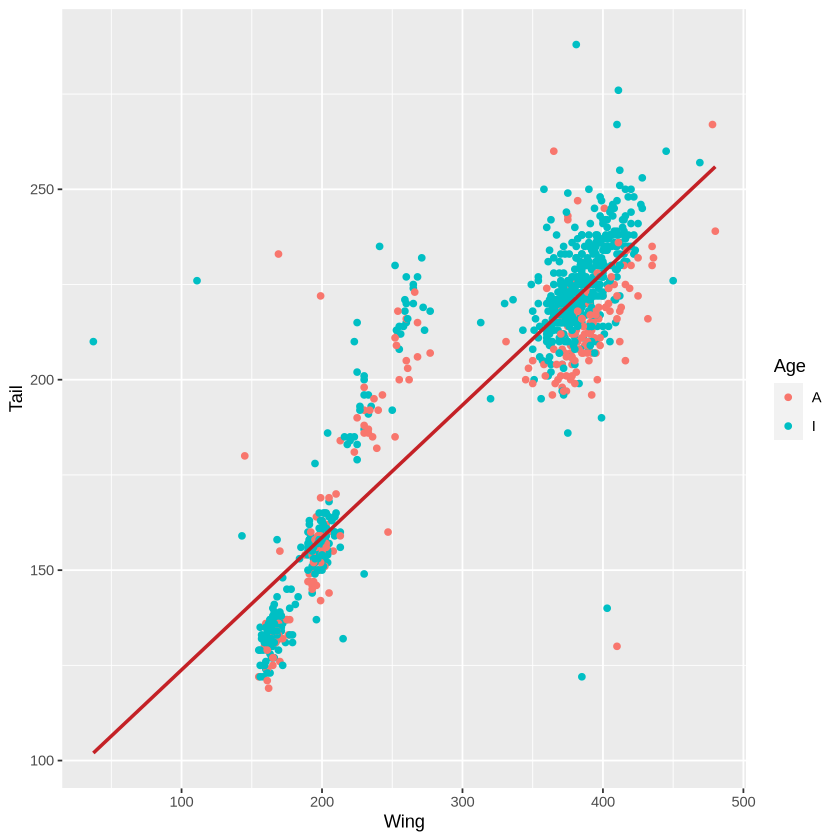

`geom_smooth()` using formula = 'y ~ x'


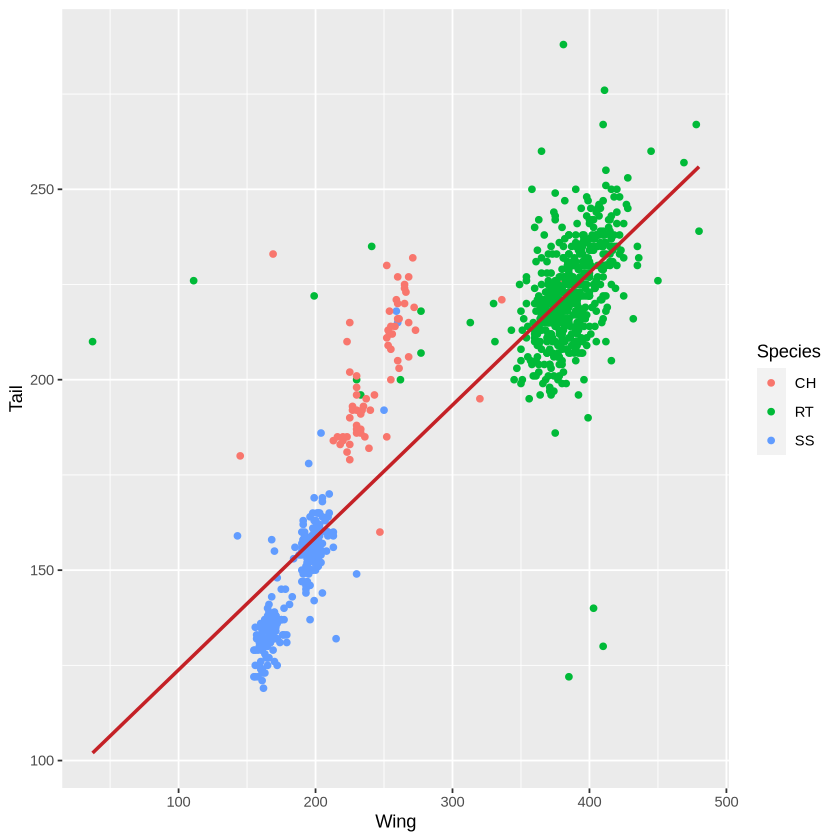

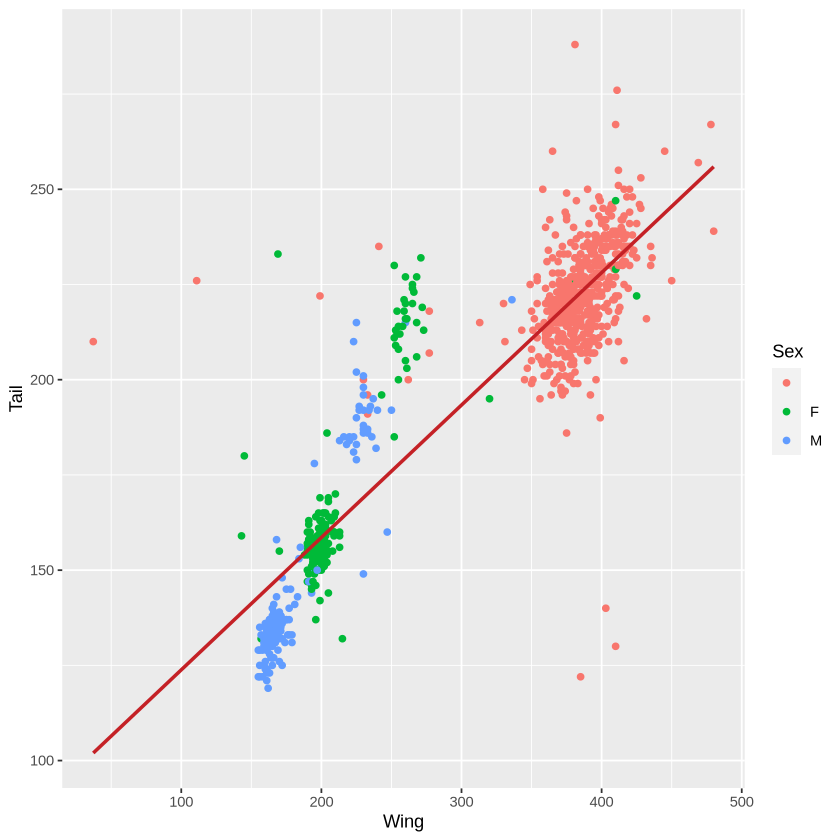

In [46]:
scatter_plot1 <- ggplot(halcon, aes(x = Wing, y = Tail)) +
    geom_point(aes(color = Age)) +
    stat_smooth(method = "lm",
        col = "#C42126",
        se = FALSE,
        size = 1)

scatter_plot2 <- ggplot(halcon, aes(x = Wing, y = Tail)) +
    geom_point(aes(color = Species)) +
    stat_smooth(method = "lm",
        col = "#C42126",
        se = FALSE,
        size = 1)

scatter_plot3 <- ggplot(halcon, aes(x = Wing, y = Tail)) +
    geom_point(aes(color = Sex)) +
    stat_smooth(method = "lm",
        col = "#C42126",
        se = FALSE,
        size = 1)


scatter_plot1
scatter_plot2
scatter_plot3

En estos scatterplots podemos observar como en efecto, ambas variables tienen una fuerte correlación positiva que da como resultado esa recta de regresión. ademas, confirmamos lo sospechado con anterioridad y comparando el segundo grafo con el tercero, se puede ver como la nube de puntos que pertenece a la especie (RT), es la misma nube de puntos que pertenece a aquellos halcones con el sexo sin identificar.

Otra cosa que podemos determinar a partir de estos gráficos, más concretamente del primero de ellos, es que la edad no afecta para nada al tamaño de las alas o de las colas de los halcones, y que en todo caso, al contrario de lo que podriamos pensar, son aquellos halcones inmaduros los que disponen de unas colas mas grandes.